In [6]:
print('Задание 1')

Задание 1


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
water_data = pd.read_csv('water.csv')
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


In [5]:
water_data

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

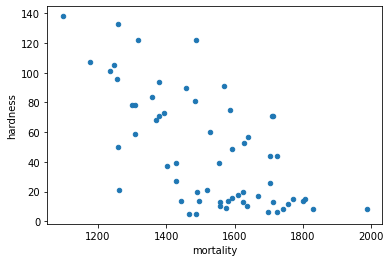

In [12]:
water_data.plot(kind='scatter', x='mortality', y='hardness')
# на графике видна средняя обратная взаимосвязь

In [13]:
water_data[['mortality', 'hardness']].corr()
# коэф коррел пирсона показывает среднюю отриц коррел

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [16]:
water_data[['mortality', 'hardness']].corr(method='spearman')
# коэф коррел спирмена показывает среднюю отриц коррел

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [17]:
water_data[['mortality', 'hardness']].corr(method='kendall')
# коэф коррел кендала показывает среднюю отриц коррел

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [124]:
X = water_data[['mortality']]
y = water_data['hardness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [125]:
X_train.shape

(51, 1)

In [126]:
y_train.shape

(51,)

In [127]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [128]:
model.coef_

array([-0.12305077])

In [129]:
model.intercept_

234.65201362750585

In [133]:
y = -0.12305077 * X + 234.65201362750585 
# модель линейной регрессии

In [134]:
y_pred = model.predict(X_test)
y_pred

array([81.2077074 , 42.93891892, 50.69111723, 25.2196085 , 73.8246614 ,
       34.69451755, 79.7310982 , 39.37044669, 47.73789883, 25.9579131 ])

In [135]:
model.score(X_test, y_test) 
# коэффициент детерминации
# Для приемлемых моделей предполагается, что коэффициент детерминации должен быть хотя бы не меньше 50 %

0.5089565409532295

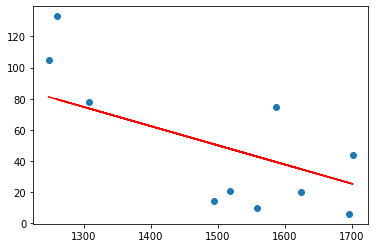

In [139]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [142]:
New_data = X_test.copy()
New_data['y_pred'] = y_pred
New_data['y_test'] = y_test
New_data

,mortality,y_pred,y_test
0,1247,81.207707,105
5,1558,42.938919,10
46,1495,50.691117,14
31,1702,25.219609,44
13,1307,73.824661,78
55,1625,34.694518,20
34,1259,79.731098,133
49,1587,39.370447,75
12,1519,47.737899,21
40,1696,25.957913,6


<AxesSubplot:xlabel='mortality', ylabel='y_pred'>

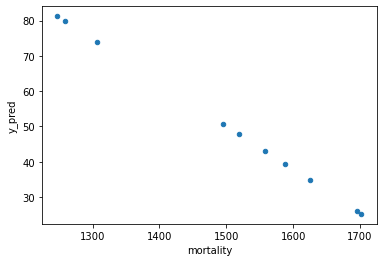

In [141]:
New_data[['mortality', 'y_pred']].plot(kind = 'scatter', x = 'mortality', y = 'y_pred')

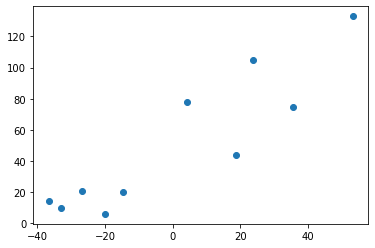

In [157]:
New_data['difference_value'] = y_test - y_pred
difference_value = New_data['difference_value']
plt.scatter(difference_value, y_test)

In [158]:
print('Задание 2')

Задание 2


In [168]:
water_south = water_data.loc[water_data['location'] == 'South']

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

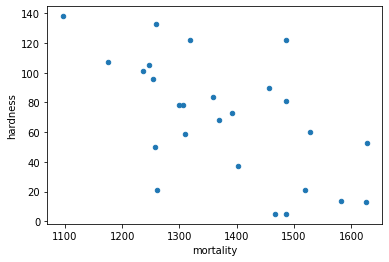

In [169]:
water_south.plot(kind='scatter', x='mortality', y='hardness')
# на графике видна средняя обратная взаимосвязь

In [170]:
water_south[['mortality', 'hardness']].corr()
# коэф коррел пирсона показывает среднюю отриц коррел

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [173]:
water_south[['mortality', 'hardness']].corr(method='spearman')
# коэф коррел спирмена показывает среднюю отриц коррел

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [174]:
water_south[['mortality', 'hardness']].corr(method='kendall')
# коэф коррел кендала показывает среднюю отриц коррел

,mortality,hardness
mortality,1.000000,-0.440315
hardness,-0.440315,1.000000


In [216]:
X = water_south[['mortality']]
y = water_south['hardness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [217]:
X_train.shape

(23, 1)

In [218]:
y_train.shape

(23,)

In [219]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [220]:
model.coef_

array([-0.15331453])

In [221]:
model.intercept_

280.39665579821605

In [222]:
y = -0.15331453 * X + 280.39665579821605
# модель линейной регрессии

In [223]:
y_pred = model.predict(X_test)
y_pred

array([78.32810468, 52.57126356, 89.21343634])

In [224]:
model.score(X_test, y_test) 
# коэффициент детерминации
# Для приемлемых моделей предполагается, что коэффициент детерминации должен быть хотя бы не меньше 50 %

0.44705874339250407

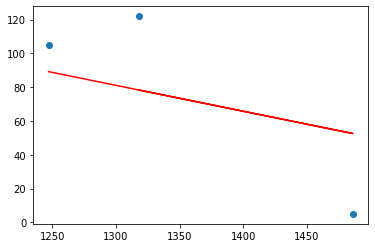

In [225]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [226]:
New_data_2 = X_test.copy()
New_data_2['y_pred'] = y_pred
New_data_2['y_test'] = y_test
New_data_2

,mortality,y_pred,y_test
18,1318,78.328105,122
38,1486,52.571264,5
0,1247,89.213436,105


<AxesSubplot:xlabel='mortality', ylabel='y_pred'>

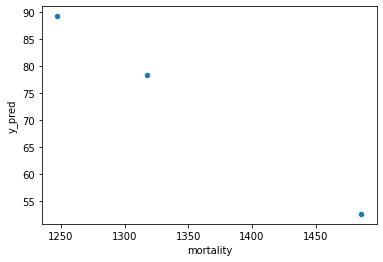

In [227]:
New_data_2[['mortality', 'y_pred']].plot(kind = 'scatter', x = 'mortality', y = 'y_pred')

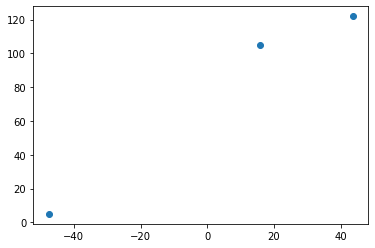

In [229]:
New_data_2['difference_value'] = y_test - y_pred
difference_value_2 = New_data_2['difference_value']
plt.scatter(difference_value_2, y_test)

In [231]:
water_north = water_data.loc[water_data['location'] == 'North']

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

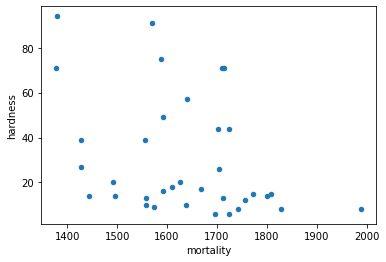

In [232]:
water_north.plot(kind='scatter', x='mortality', y='hardness')
# на графике видна слабая обратная взаимосвязь

In [233]:
water_north[['mortality', 'hardness']].corr()
# коэф коррел пирсона показывает слабую отриц коррел

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [234]:
water_north[['mortality', 'hardness']].corr(method='spearman')
# коэф коррел спирмена показывает слабую отриц коррел

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [235]:
water_north[['mortality', 'hardness']].corr(method='kendall')
# коэф коррел кендала показывает слабую отриц коррел

,mortality,hardness
mortality,1.000000,-0.283058
hardness,-0.283058,1.000000


In [236]:
X = water_north[['mortality']]
y = water_north['hardness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [237]:
X_train.shape

(31, 1)

In [238]:
y_train.shape

(31,)

In [239]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [240]:
model.coef_

array([-0.08319223])

In [241]:
model.intercept_

168.50962324709064

In [242]:
y = -0.08319223 * X + 168.50962324709064
# модель линейной регрессии

In [243]:
y_pred = model.predict(X_test)
y_pred

array([ 3.20666642, 37.56505654, 48.38004617, 25.08622235])

In [244]:
model.score(X_test, y_test) 
# коэффициент детерминации
# Для приемлемых моделей предполагается, что коэффициент детерминации должен быть хотя бы не меньше 50 %

-67.63913554035241

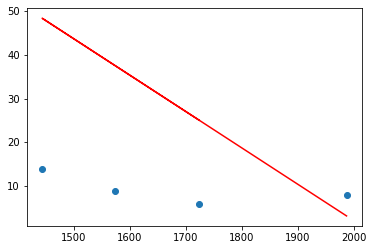

In [245]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [246]:
New_data_3 = X_test.copy()
New_data_3['y_pred'] = y_pred
New_data_3['y_test'] = y_test
New_data_3

,mortality,y_pred,y_test
45,1987,3.206666,8
23,1574,37.565057,9
43,1444,48.380046,14
36,1724,25.086222,6


<AxesSubplot:xlabel='mortality', ylabel='y_pred'>

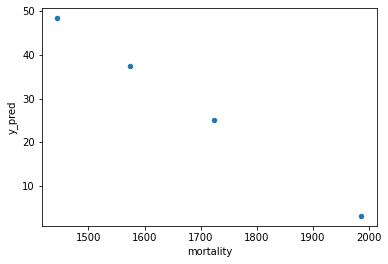

In [247]:
New_data_3[['mortality', 'y_pred']].plot(kind = 'scatter', x = 'mortality', y = 'y_pred')

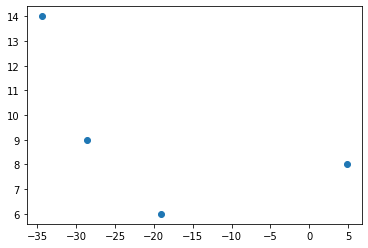

In [249]:
New_data_3['difference_value'] = y_test - y_pred
difference_value_3 = New_data_3['difference_value']
plt.scatter(difference_value_3, y_test)

In [ ]:
# На южных регионах прослеживается похожая тенденция по корреляции и регрессии. 
# Данные по северным регионам слабые (практически отсутствует корреляция и сложно составить прогноз данных)